In [63]:
# common

import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

def plot(x_label, y_label, fill=False, lim=True, y=None):
    if y:
        x = np.linspace(0, 1, 100)
        y = y(x)
        if fill:
            plt.plot(x, y, lw=3, color='w')
            plt.fill_between(x, y, 1, color='b', alpha=fill_alpha)
            plt.fill_between(x, y, 0, color='r', alpha=fill_alpha)
        else:
            plt.plot(x, y, lw=line_weight, color='k', alpha=.25)

    if lim:
        plt.xlim(0, 1)
        plt.ylim(0, 1)
            
    plt.xlabel(x_label, size=16)
    plt.ylabel(y_label, size=16)
    #plt.xticks([])
    #plt.yticks([])
    plt.show()
    
def seed():
    np.random.seed(0)
    
plt.rcParams['figure.figsize'] = [8, 6]

fill_alpha = .25
line_weight = 3

In [ ]:
# redundant feature

def y(x):
    return 0 * x + .5

seed();

n_dots = 30

positive_noise = np.random.random(n_dots) * .45 + .05
negative_noise = np.random.random(n_dots) * .45 + .05
positive_x = np.random.uniform(size=n_dots)
negative_x = np.random.uniform(size=n_dots)

plt.plot(positive_x, y(positive_x) + positive_noise, 'bo')
plt.plot(negative_x, y(negative_x) - negative_noise, 'rx')
plot(r'$x_1$', r'$x_2$', fill=True, y=y)

In [ ]:
# linear and quadratic boundary

def y(x):
    return x

def y2(x):
    return 2 * x ** 2 - .8 * x + .3

seed();

n_dots = 20

positive_noise = np.random.normal( .3, .1, n_dots)
negative_noise = np.random.normal(-.3, .1, n_dots)
positive_x = np.random.uniform(size=n_dots)
negative_x = np.random.uniform(size=n_dots)

plt.plot(positive_x, y(positive_x) + positive_noise, 'bo')
plt.plot(negative_x, y(negative_x) + negative_noise, 'rx')
plot(r'$x_1$', r'$x_2$', fill=True, y=y)

plt.plot(positive_x, y2(positive_x) + positive_noise, 'bo')
plt.plot(negative_x, y2(negative_x) + negative_noise, 'rx')
plot(r'$x_1$', r'$x_2$', full=True, y=y2)

In [ ]:
# decision tree boundary

X1 = [8, 9, 6, 9.5, 6]
Y1 = [6, 7, 9, 8.5, 7]

X2 = [4, 3, 7, 2, 1]
Y2 = [2, 1, 3, 4, 8]

plt.plot(X1, Y1, 'bo')
plt.plot(X2, Y2, 'rx')

plt.axhline(y=5, color='w', lw=line_weight)
plt.axvline(x=4, ymin=0.5, ymax=1, color='w', lw=line_weight)

plt.fill([0,0, 4, 4], [5,10,10,5], alpha=fill_alpha, color='r')
plt.fill([0,0,10,10], [0, 5, 5,0], alpha=fill_alpha, color='r')
plt.fill([4,4,10,10], [5,10,10,5], alpha=fill_alpha, color='b')

plt.xlim(0, 10)
plt.ylim(0, 10)
plot(r'$x_1$', r'$x_2$', lim=False)

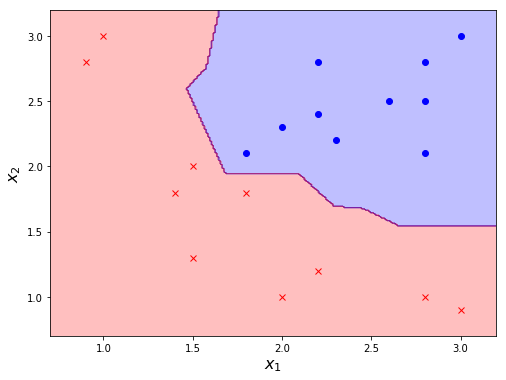

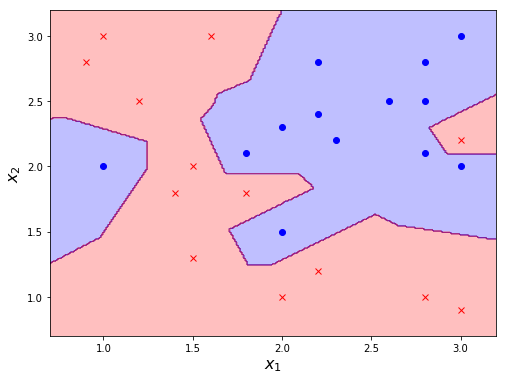

In [72]:
# knn boundary

def knn_boundary(n_pos, n_neg):
    x_pos = [2.0, 2.3, 2.3, 2.2, 2.2, 2.4, 2.8, 2.5, 2.8, 2.1, 2.6, 2.5, 2.2, 2.8, 2.8, 2.8, 1.8, 2.1, 3.0, 3.0, 1.0, 2.0, 2.0, 1.5, 3.0, 2.0]
    x_neg = [1.0, 3.0, 1.8, 1.8, 1.5, 2.0, 1.4, 1.8, 2.0, 1.0, 0.9, 2.8, 2.2, 1.2, 3.0, 0.9, 2.8, 1.0, 1.5, 1.3, 1.2, 2.5, 1.6, 3.0, 3.0, 2.2]
    x_pos = np.array(x_pos)[:2*n_pos].reshape(-1, 2)
    x_neg = np.array(x_neg)[:2*n_neg].reshape(-1, 2)
    x = np.vstack((x_neg, x_pos))
    y = np.array([1]*len(x_pos) + [-1]*len(x_neg))

    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(x, y)

    x_min, x_max = np.amin(x, axis=0)-.2, np.amax(x, axis=0)+.2
    xx1 = np.arange(x_min[0], x_max[0] + .01, .01)
    xx2 = np.arange(x_min[1], x_max[1] + .01, .01)
    xx1, xx2 = np.meshgrid(xx1, xx2)
    y = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

    plt.plot(x_pos[:,0], x_pos[:,1], 'bo')
    plt.plot(x_neg[:,0], x_neg[:,1], 'rx')
    plt.contourf(xx1, xx2, y, alpha=fill_alpha, colors=('b', 'r'))

    plt.xlim(x_min[0], x_max[0])
    plt.ylim(x_min[1], x_max[1])
    plot(r'$x_1$', r'$x_2$', lim=False)

knn_boundary(10, 10)
knn_boundary(13, 13)

In [ ]:
# linear and quadratic regression

def y(x):
    return x

def y2(x):
    return 2 * x ** 2 - .8 * x + .3

seed();

n_dots = 20

noise = np.random.normal(0, .05, n_dots)
x = np.random.uniform(size=n_dots)

plt.plot(x, y(x) + noise, 'ko')
plot(r'$x$', r'$y$', y=y)

#plt.plot(x, y2(x) + noise, 'bo')
#plot(r'$x$', r'$y$', y=y2)

In [ ]:
# linear boundary 3d

def y(x1, x2):
    return x1 + x2 + 0.1

seed();

n_dots = 30;

p_noise = np.random.normal( .3, .1, n_dots)
n_noise = np.random.normal(-.3, .1, n_dots)
p_x1, p_x2 = np.random.uniform(size=n_dots), np.random.uniform(size=30)
n_x1, n_x2 = np.random.uniform(size=n_dots), np.random.uniform(size=30)

X1 = np.linspace(0, 1, 100)
X2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(X1, X2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, y(X1, X2), color='k', linewidth=0, alpha=.25)
ax.scatter(p_x1, p_x2, y(p_x1, p_x2) + p_noise + 1, c='b', marker='o')
ax.scatter(n_x1, n_x2, y(n_x1, n_x2) + n_noise - 1, c='r', marker='x')

ax.set_xlabel(r"$x_1$", size=16)
ax.set_ylabel(r"$x_2$", size=16)
ax.set_zlabel(r"$x_3$", size=16)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

In [ ]:
# regression 2d

from mpl_toolkits.mplot3d import Axes3D

def y(x1, x2):
    return x1 + x2 + 0.1

seed();

n_dots = 60;

noise = np.random.normal(0, .2, n_dots)

_x1, _x2 = np.random.uniform(size=n_dots), np.random.uniform(size=60)

X1 = np.linspace(0, 1, 100)
X2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(X1, X2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, y(X1, X2), color='k', linewidth=0, alpha=.25)
ax.scatter(_x1, _x2, y(_x1, _x2) + noise , c='k', marker='o')

ax.set_xlabel(r"$x_1$", size=16)
ax.set_ylabel(r"$x_2$", size=16)
ax.set_zlabel(r"$y$", size=16)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

In [ ]:
# piecewise linear regression

def y(x):
    return x**2 - 0.4 * x + 0.3

def plot_line():
    plt.plot(x, y, lw=1, color='k')

seed();

n_dots = 50

# real distribution
x = np.linspace(-1, 1, 20)
plt.plot(x, y(x), 'k', lw=10, alpha=.25)

# dots
x = np.random.uniform(size=n_dots) * 2 - 1
noise = np.random.normal(0, .05, n_dots)
plt.plot(x, y(x) + noise, 'ko')

# piecewise linear models
x = np.linspace(-.750, -.375, 2); y = -1.4 * x + 0.0500; plot_line()
x = np.linspace(-.375, -.125, 2); y = -0.9 * x + 0.2375; plot_line()
x = np.linspace(-.125,  .125, 2); y = -0.4 * x + 0.3000; plot_line()
x = np.linspace( .125,  .375, 2); y =  0.1 * x + 0.2375; plot_line()
x = np.linspace( .375,  .625, 2); y =  0.6 * x + 0.0500; plot_line()
x = np.linspace( .625, 1.000, 2); y =  1.1 * x - 0.2625; plot_line()

plt.xlim(-1, 1)
plt.ylim( 0, 1)
plot(r'$x$', r'$y$', lim=False)

In [ ]:
# guassian mixture
from scipy.stats import norm

X = np.linspace(-5, 5, 100)
rv1 = norm(loc = 0, scale = .5)
p1 = rv1.pdf(X)
rv2 = norm(loc = -1, scale = 1.5)
p2 = rv2.pdf(X)
rv3 = norm(loc = 1, scale = 1)
p3 = rv3.pdf(X)

p4 = p1 + p2 + p3

plt.plot(X, p1, 'b')
plt.plot(X, p2, 'g')
plt.plot(X, p3, 'r')
plt.plot(X, p4, 'k--')

plt.xlim(-4, 4)
plot(r'$x$', r'$y$', lim=False)

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import graphviz
import pydotplus

rawdata = np.loadtxt('german_credit.csv', delimiter=',', dtype=str)
feature_names = rawdata[0][1:]
X, y = np.array(rawdata[1:, 1:], dtype=np.float32), np.array(rawdata[1:, 0],np.int32)
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=['bad', 'good'], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())